In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_train = pd.read_csv('../input/titanic/train.csv') 

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
newpclass = pd.Categorical(titanic_train['Pclass'],ordered=True)
newpclass = newpclass.rename_categories(["class1",'class2','class3'])


In [5]:
newpclass.categories

Index(['class1', 'class2', 'class3'], dtype='object')

In [6]:
titanic_train["Pclass"] = newpclass

In [7]:
titanic_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
char_cabin = titanic_train["Cabin"].astype(str)
titanic_train["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
titanic_train["Cabin"].astype

<bound method NDFrame.astype of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [10]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin])

In [11]:
new_Cabin = pd.Categorical(new_Cabin)

In [12]:
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe159ba03d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe159ba0e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe159ba0490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe159bb4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe159bb4890>],
 'means': []}

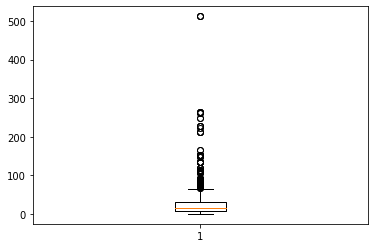

In [14]:
plt.boxplot(x = 'Fare',data = titanic_train)

In [15]:
max_fare = np.where(titanic_train["Fare"] == max(titanic_train['Fare']))
titanic_train.loc[max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,class1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
